In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,GlobalMaxPooling2D,AveragePooling2D,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2 
from tensorflow.keras import datasets, losses

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [3]:
# data 8x8 L
df_hmnist_8_8_L = pd.read_csv('./Data/hmnist_8_8_L.csv/hmnist_8_8_L.csv')
df_hmnist_8_8_L_Labels = df_hmnist_8_8_L['label']
df_hmnist_8_8_L = df_hmnist_8_8_L.drop('label',axis=1)
df_hmnist_8_8_L.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0054,pixel0055,pixel0056,pixel0057,pixel0058,pixel0059,pixel0060,pixel0061,pixel0062,pixel0063
0,172,182,191,183,180,181,165,164,173,192,...,171,159,171,181,201,192,184,183,171,157
1,98,149,170,193,183,162,164,100,137,175,...,166,135,83,159,186,185,192,181,143,58
2,165,164,179,172,152,163,169,151,168,174,...,175,169,152,171,185,189,193,176,168,151
3,109,159,167,166,163,159,155,96,141,168,...,157,101,79,146,170,167,158,154,133,45
4,173,202,210,194,208,248,243,205,180,142,...,211,230,160,199,206,208,209,205,200,186


In [4]:
# 10015 rows, 64 columns
df_hmnist_8_8_L.shape

(10015, 64)

In [5]:
df_hmnist_8_8_L_Labels

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64

In [6]:
df_hmnist_8_8_L_Labels.shape

(10015,)

In [7]:
df_hmnist_8_8_L.keys()

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       'pixel0010', 'pixel0011', 'pixel0012', 'pixel0013', 'pixel0014',
       'pixel0015', 'pixel0016', 'pixel0017', 'pixel0018', 'pixel0019',
       'pixel0020', 'pixel0021', 'pixel0022', 'pixel0023', 'pixel0024',
       'pixel0025', 'pixel0026', 'pixel0027', 'pixel0028', 'pixel0029',
       'pixel0030', 'pixel0031', 'pixel0032', 'pixel0033', 'pixel0034',
       'pixel0035', 'pixel0036', 'pixel0037', 'pixel0038', 'pixel0039',
       'pixel0040', 'pixel0041', 'pixel0042', 'pixel0043', 'pixel0044',
       'pixel0045', 'pixel0046', 'pixel0047', 'pixel0048', 'pixel0049',
       'pixel0050', 'pixel0051', 'pixel0052', 'pixel0053', 'pixel0054',
       'pixel0055', 'pixel0056', 'pixel0057', 'pixel0058', 'pixel0059',
       'pixel0060', 'pixel0061', 'pixel0062', 'pixel0063'],
      dtype='object')

In [30]:
np.unique(df_hmnist_8_8_L_Labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()

In [10]:
# SVM Analysis Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_hmnist_8_8_L, df_hmnist_8_8_L_Labels, test_size=0.30, random_state=101)

In [11]:
model.fit(X_train,y_train)

SVC()

In [12]:
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))

[[   1    1    5    0   79    0    0]
 [   1    0    6    0  150    0    1]
 [   1    0   45    0  281    0    5]
 [   0    0    3    0   28    0    0]
 [   0    0   14    0 1980    0    9]
 [   0    0    1    0   37    0    0]
 [   0    0   14    0  322    0   21]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.33      0.01      0.02        86
           1       0.00      0.00      0.00       158
           2       0.51      0.14      0.21       332
           3       0.00      0.00      0.00        31
           4       0.69      0.99      0.81      2003
           5       0.00      0.00      0.00        38
           6       0.58      0.06      0.11       357

    accuracy                           0.68      3005
   macro avg       0.30      0.17      0.17      3005
weighted avg       0.59      0.68      0.58      3005



c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Finding the optimal parameters to perform SVM analysis
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.671 total time=  19.4s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.671 total time=  17.7s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.670 total time=  16.6s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.670 total time=  19.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.670 total time=  17.4s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.671 total time=  16.9s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.671 total time=  17.7s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.670 total time=  16.6s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.670 total time=  17.2s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.670 total time=  24.3s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.671 total time=  16.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [18]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [19]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [20]:
grid_predictions = grid.predict(X_test)

In [21]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[   3    6   11    0   66    0    0]
 [   4   13   13    0  127    0    1]
 [   2    2   61    0  264    0    3]
 [   0    2    2    0   27    0    0]
 [   1    0   18    0 1981    0    3]
 [   0    1    1    0   36    0    0]
 [   0    0   17    0  337    0    3]]


              precision    recall  f1-score   support

           0       0.30      0.03      0.06        86
           1       0.54      0.08      0.14       158
           2       0.50      0.18      0.27       332
           3       0.00      0.00      0.00        31
           4       0.70      0.99      0.82      2003
           5       0.00      0.00      0.00        38
           6       0.30      0.01      0.02       357

    accuracy                           0.69      3005
   macro avg       0.33      0.19      0.19      3005
weighted avg       0.59      0.69      0.59      3005



c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [8]:
# TensorFlow - Neural Networks/ Simple Test. Not actual code to be used
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [9]:
print(tf.__version__)

2.6.1


In [10]:
# Example
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

In [25]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_hmnist_8_8_L)
df_hmnist_8_8_L = scaler.transform(df_hmnist_8_8_L)

In [20]:
# Grayscale 8x8
X_train, X_test, y_train, y_test = train_test_split(df_hmnist_8_8_L, df_hmnist_8_8_L_Labels, test_size=0.30, random_state=101)

In [22]:
X_train[0:10]

array([[0.73306773, 0.73913043, 0.73858921, 0.69196429, 0.71186441,
        0.68897638, 0.71314741, 0.74380165, 0.67843137, 0.75609756,
        0.68534483, 0.61206897, 0.63636364, 0.72173913, 0.73622047,
        0.7195122 , 0.62598425, 0.66942149, 0.53968254, 0.45991561,
        0.56734694, 0.752     , 0.76890756, 0.7250996 , 0.65863454,
        0.56626506, 0.3902439 , 0.39366516, 0.59192825, 0.71259843,
        0.73839662, 0.70866142, 0.59437751, 0.59493671, 0.43027888,
        0.43421053, 0.68325792, 0.73493976, 0.69456067, 0.68951613,
        0.56910569, 0.57709251, 0.62301587, 0.51004016, 0.59109312,
        0.75409836, 0.67355372, 0.64489796, 0.65098039, 0.57258065,
        0.60655738, 0.63445378, 0.57333333, 0.62719298, 0.71836735,
        0.62      , 0.668     , 0.64031621, 0.58      , 0.67206478,
        0.66532258, 0.60474308, 0.592     , 0.63492063],
       [0.68525896, 0.6798419 , 0.66804979, 0.66964286, 0.71186441,
        0.72047244, 0.7250996 , 0.75206612, 0.66666667, 0.6

In [21]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [4]:
df_hmnist_8_8_L_Labels.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

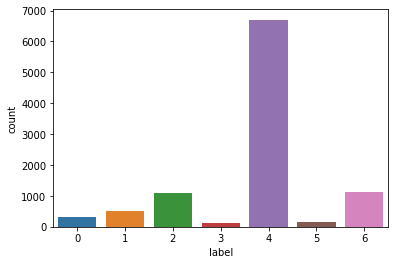

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(df_hmnist_8_8_L_Labels,x="label")

In [23]:
X_train,y_train = smt.fit_resample(X_train,y_train)

In [24]:
X_test,y_test = smt.fit_resample(X_test,y_test)

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

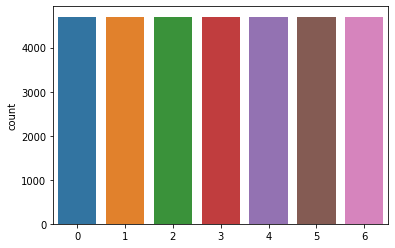

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(y_train)

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(8,8)))
model.add(Dense(50,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(optimizer='rmsprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
#model.add(Dense(4,activation='relu'))
#model.add(Dense(4,activation='relu'))
#model.add(Dense(4,activation='relu'))
#model.add(Dense(1))
#model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [28]:
#X_train = X_train/255.0
X_train[0:10]

array([[0.73306773, 0.73913043, 0.73858921, 0.69196429, 0.71186441,
        0.68897638, 0.71314741, 0.74380165, 0.67843137, 0.75609756,
        0.68534483, 0.61206897, 0.63636364, 0.72173913, 0.73622047,
        0.7195122 , 0.62598425, 0.66942149, 0.53968254, 0.45991561,
        0.56734694, 0.752     , 0.76890756, 0.7250996 , 0.65863454,
        0.56626506, 0.3902439 , 0.39366516, 0.59192825, 0.71259843,
        0.73839662, 0.70866142, 0.59437751, 0.59493671, 0.43027888,
        0.43421053, 0.68325792, 0.73493976, 0.69456067, 0.68951613,
        0.56910569, 0.57709251, 0.62301587, 0.51004016, 0.59109312,
        0.75409836, 0.67355372, 0.64489796, 0.65098039, 0.57258065,
        0.60655738, 0.63445378, 0.57333333, 0.62719298, 0.71836735,
        0.62      , 0.668     , 0.64031621, 0.58      , 0.67206478,
        0.66532258, 0.60474308, 0.592     , 0.63492063],
       [0.68525896, 0.6798419 , 0.66804979, 0.66964286, 0.71186441,
        0.72047244, 0.7250996 , 0.75206612, 0.66666667, 0.6

In [29]:
X_train.shape

(32914, 64)

In [30]:
#X_test = X_test/255.0
X_test

array([[0.70916335, 0.71541502, 0.71369295, ..., 0.71146245, 0.688     ,
        0.69444444],
       [0.60557769, 0.58498024, 0.593361  , ..., 0.59288538, 0.572     ,
        0.57539683],
       [0.61354582, 0.68774704, 0.70539419, ..., 0.69960474, 0.664     ,
        0.59920635],
       ...,
       [0.41146733, 0.52071494, 0.56985046, ..., 0.68467447, 0.6348176 ,
        0.52946865],
       [0.71813439, 0.68361277, 0.58788097, ..., 0.61741408, 0.67477708,
        0.6749955 ],
       [0.10823108, 0.4438303 , 0.55117842, ..., 0.582039  , 0.5038672 ,
        0.28469894]])

In [31]:
y_train[0:10]

array([4, 4, 4, 4, 0, 4, 6, 4, 4, 4], dtype=int64)

In [41]:
model.fit(x=X_train,y=y_train,epochs=25,verbose=1)

Epoch 1/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7532 - sparse_categorical_accuracy: 0.7216
Epoch 2/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7520 - sparse_categorical_accuracy: 0.7234
Epoch 3/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7495 - sparse_categorical_accuracy: 0.7216
Epoch 4/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7443 - sparse_categorical_accuracy: 0.7251
Epoch 5/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7522 - sparse_categorical_accuracy: 0.7210
Epoch 6/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7506 - sparse_categorical_accuracy: 0.7246
Epoch 7/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7533 - sparse_categorical_accuracy: 0.7208
Epoch 8/25
1029/1029 [==============================] - 1s 1ms/step - loss: 0.7508 - sparse_categorical_accuracy: 0.7196
Epoch 9/25
1029/1029 [==========

<AxesSubplot:>

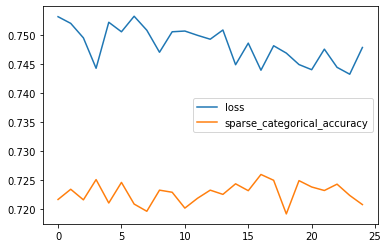

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [43]:
model.evaluate(x=X_test,y=y_test,verbose=0)

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


[2.9195196628570557, 0.39619141817092896]

In [44]:
test_predictions = model.predict(X_test)
test_predictions[0:10]

array([[1.49661405e-02, 1.26323149e-01, 6.79887384e-02, 7.42302835e-01,
        3.88813876e-02, 8.19361521e-05, 9.45573114e-03],
       [7.04066906e-07, 5.15935011e-04, 1.72128007e-01, 6.47105113e-12,
        5.87269425e-01, 1.86017841e-01, 5.40681370e-02],
       [4.47409367e-03, 2.57566739e-02, 2.26793457e-02, 9.41875935e-01,
        3.64989392e-03, 4.95898860e-07, 1.56358734e-03],
       [8.31973302e-05, 1.41565138e-02, 2.42904857e-01, 1.79575831e-12,
        1.39841689e-02, 3.06451975e-09, 7.28871346e-01],
       [7.33535388e-04, 2.42050411e-03, 6.86161101e-01, 6.92144965e-07,
        3.19252685e-02, 7.19945183e-06, 2.78751671e-01],
       [2.54386180e-07, 2.27349460e-06, 3.32512781e-02, 4.52000971e-11,
        1.59021333e-01, 1.07088214e-08, 8.07724893e-01],
       [7.55979030e-08, 4.02879843e-04, 7.61167288e-01, 7.04074576e-09,
        1.54939890e-01, 3.27624093e-07, 8.34894776e-02],
       [3.29357341e-08, 6.26334906e-01, 9.34329331e-02, 2.12532620e-20,
        2.80224383e-01, 8

In [45]:
type(test_predictions)

numpy.ndarray

In [46]:
y_test[0:10]

array([2, 4, 2, 0, 2, 6, 4, 2, 4, 3], dtype=int64)

In [6]:
##### leNet Implementation - Actual Code #####
# 28x28L data
df_hmnist_28_28_L = pd.read_csv('./Data/hmnist_28_28_L.csv/hmnist_28_28_L.csv')
df_hmnist_28_28_L_Labels = np.asarray(df_hmnist_28_28_L['label'])
df_hmnist_28_28_L = df_hmnist_28_28_L.drop('label',axis=1)
df_hmnist_28_28_L.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,169,171,170,177,181,182,181,185,194,192,...,176,184,186,185,180,157,140,140,159,165
1,19,57,105,140,149,148,144,155,170,170,...,181,172,175,160,144,114,89,47,18,18
2,155,163,161,167,167,172,155,152,165,175,...,162,163,178,157,166,167,148,141,136,115
3,25,71,116,139,136,153,148,161,172,162,...,142,125,135,138,137,111,71,32,16,16
4,129,162,181,196,205,208,205,213,225,224,...,211,210,197,172,190,195,193,181,147,88


In [7]:
df_hmnist_28_28_L.shape

(10015, 784)

In [8]:
hmnist_28_28_L = np.asarray(df_hmnist_28_28_L)
hmnist_28_28_L[0:10]

array([[169, 171, 170, ..., 140, 159, 165],
       [ 19,  57, 105, ...,  47,  18,  18],
       [155, 163, 161, ..., 141, 136, 115],
       ...,
       [131, 139, 140, ..., 113,  67,  22],
       [ 96, 129, 138, ...,  91,  43,  11],
       [195, 191, 185, ..., 166, 174, 167]], dtype=int64)

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

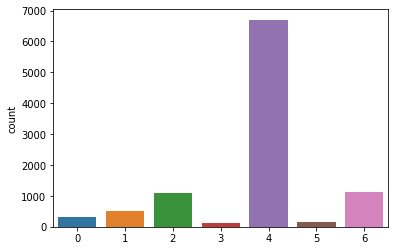

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(df_hmnist_28_28_L_Labels)

In [38]:
# Grayscale 28x28
X_train, X_test, y_train, y_test = train_test_split(hmnist_28_28_L, df_hmnist_28_28_L_Labels, test_size=0.30, random_state=101)

In [43]:
X_train.shape
X_train = X_train.reshape(X_train.shape[0],28,28)
type(X_train)

numpy.ndarray

In [44]:
X_train.shape

(7010, 28, 28)

In [45]:
X_test.shape
X_test = X_test.reshape(X_test.shape[0],28,28)
type(X_test)

numpy.ndarray

In [46]:
X_train = tf.convert_to_tensor(X_train, np.float64)
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [47]:
X_test = tf.convert_to_tensor(X_test, np.float64)
type(X_test)

tensorflow.python.framework.ops.EagerTensor

In [48]:
X_train = tf.pad(X_train, [[0, 0], [2,2],[2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2],[2,2]])/255
print(X_train.shape)
print(X_test.shape)

(7010, 32, 32)
(3005, 32, 32)


In [50]:
X_train = tf.expand_dims(X_train, axis=3, name=None)
X_test = tf.expand_dims(X_test, axis=3, name=None)
print(X_train.shape)
print(X_test.shape)

(7010, 32, 32, 1)
(3005, 32, 32, 1)


In [51]:
X_train.shape[1:]

TensorShape([32, 32, 1])

In [52]:
X_train = tf.image.grayscale_to_rgb(X_train,name=None)
print(X_train.shape)

(7010, 32, 32, 3)


In [53]:
X_test = tf.image.grayscale_to_rgb(X_test,name=None)
print(X_test.shape)

(3005, 32, 32, 3)


In [22]:
# 28x28RGB data
df_hmnist_28_28_RGB = pd.read_csv('./Data/hmnist_28_28_RGB.csv/hmnist_28_28_RGB.csv')
df_hmnist_28_28_RGB_Labels = np.asarray(df_hmnist_28_28_RGB['label'])
df_hmnist_28_28_RGB = df_hmnist_28_28_RGB.drop('label',axis=1)
df_hmnist_28_28_RGB.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


28x28RGB Shape = (10015, 2352)


c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(7010, 2352)
X-train RGB type = <class 'numpy.ndarray'>
X-train RGB shape = (7010, 28, 28, 3)
X-test RGB type = <class 'numpy.ndarray'>
X-test RGB shape = (3005, 28, 28, 3)
X-train RGB type = <class 'tensorflow.python.framework.ops.EagerTensor'>
X-test RGB type = <class 'tensorflow.python.framework.ops.EagerTensor'>
(7010, 32, 32, 3)
(3005, 32, 32, 3)
(7010, 32, 32, 3)
(3005, 32, 32, 3)
train input shape = (32, 32, 3)


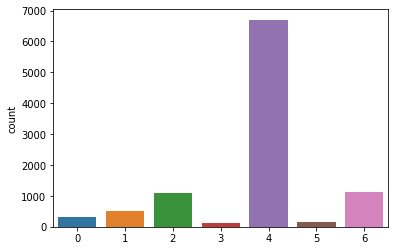

In [31]:
print("28x28RGB Shape = " + str(df_hmnist_28_28_RGB.shape))

hmnist_28_28_RGB = np.asarray(df_hmnist_28_28_RGB)

plt.figure(figsize=(6,4))
sns.countplot(df_hmnist_28_28_RGB_Labels)

# Grayscale 28x28
X_train_RGB, X_test_RGB, y_train_RGB, y_test_RGB = train_test_split(hmnist_28_28_RGB, df_hmnist_28_28_RGB_Labels, test_size=0.30, random_state=101)

print(str(X_train_RGB.shape))
X_train_RGB = X_train_RGB.reshape(X_train_RGB.shape[0],28,28,3)
print("X-train RGB type = " + str(type(X_train_RGB)))

print("X-train RGB shape = " + str(X_train_RGB.shape))

X_test_RGB = X_test_RGB.reshape(X_test_RGB.shape[0],28,28,3)
print("X-test RGB type = " + str(type(X_test_RGB)))
print("X-test RGB shape = " + str(X_test_RGB.shape))

X_train_RGB = tf.convert_to_tensor(X_train_RGB, np.float64)
print("X-train RGB type = " + str(type(X_train_RGB)))

X_test_RGB = tf.convert_to_tensor(X_test_RGB, np.float64)
print("X-test RGB type = " + str(type(X_test_RGB)))

X_train_RGB = tf.pad(X_train_RGB, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_RGB = tf.pad(X_test_RGB, [[0, 0], [2,2],[2,2],[0,0]])/255
print(X_train_RGB.shape)
print(X_test_RGB.shape)

#X_train_RGB = tf.expand_dims(X_train_RGB, axis=3, name=None)
#X_test_RGB = tf.expand_dims(X_test_RGB, axis=3, name=None)
print(X_train_RGB.shape)
print(X_test_RGB.shape)

print("train input shape = " + str(X_train_RGB.shape[1:]))

In [13]:
####### Reading the original Part 1 Images #########
imagesPart1 = pd.read_csv('./Data/imagesPart1.csv',header=None)
imagesPart1 = np.asarray(imagesPart1)
imagesPart1Labels = pd.read_csv('./Data/HAM10000_metadata_labels_part1.csv')
imagesPart1Labels = np.asarray(imagesPart1Labels['dx'])
X_train_part1, X_test_part1, y_train_part1, y_test_part1 = train_test_split(imagesPart1, imagesPart1Labels, stratify=imagesPart1Labels, test_size=0.20, random_state=101)

X_train_part1.shape

X_train_part1 = X_train_part1.reshape(X_train_part1.shape[0],28,28,3)
X_train_part1.shape

X_test_part1.shape

X_test_part1 = X_test_part1.reshape(X_test_part1.shape[0],28,28,3)
X_test_part1.shape

X_train_part1 = tf.convert_to_tensor(X_train_part1, np.float64)
type(X_train_part1)

X_test_part1 = tf.convert_to_tensor(X_test_part1, np.float64)
type(X_test_part1)

X_train_part1 = tf.pad(X_train_part1, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_part1 = tf.pad(X_test_part1, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_part1.shape)
print(X_test_part1.shape)

(4000, 32, 32, 3)
(1000, 32, 32, 3)


In [3]:
#### Read augmented images array Part 1 ####
df_AugImagesPart1 = pd.read_csv('./Data/augImagesPart1.csv',header=None)

df_AugImagesPart1_Labels = pd.read_csv('./Data/augImagesPart1_Labels.csv')
df_AugImagesPart1_Labels = np.asarray(df_AugImagesPart1_Labels['dx'])

df_AugImagesPart1 = np.asarray(df_AugImagesPart1)
print("shape = " + str(df_AugImagesPart1.shape))

X_train_augPart1, X_test_augPart1, y_train_augPart1, y_test_augPart1 = train_test_split(df_AugImagesPart1, df_AugImagesPart1_Labels, stratify=df_AugImagesPart1_Labels,
                                                                                        test_size=0.20, random_state=101)

temp = np.asarray(df_AugImagesPart1_Labels)
print("0 count = ", (temp == 0).sum())
print("1 count = ", (temp == 1).sum())
print("2 count = ", (temp == 2).sum())
print("3 count = ", (temp == 3).sum())
print("4 count = ", (temp == 4).sum())
print("5 count = ", (temp == 5).sum())
print("6 count = ", (temp == 6).sum())

print("X-train-augPart1 shape = " + str(X_train_augPart1.shape))
X_train_augPart1 = X_train_augPart1.reshape(X_train_augPart1.shape[0],28,28,3)
print("X-train-augPart1 shape = " + str(X_train_augPart1.shape))

X_test_augPart1 = X_test_augPart1.reshape(X_test_augPart1.shape[0],28,28,3)
print("X-test-augPart1 shape = " + str(X_test_augPart1.shape))

X_train_augPart1 = tf.convert_to_tensor(X_train_augPart1, np.float64)
print("X-train-augPart1 type = " + str(type(X_train_augPart1)))

X_test_augPart1 = tf.convert_to_tensor(X_test_augPart1, np.float64)
print("X-test-augPart1 shape = " + str(type(X_test_augPart1)))

X_train_augPart1 = tf.pad(X_train_augPart1, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_augPart1 = tf.pad(X_test_augPart1, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_augPart1.shape)
print(X_test_augPart1.shape)

shape = (5000, 2352)
0 count =  0
1 count =  514
2 count =  1095
3 count =  115
4 count =  2025
5 count =  142
6 count =  1109
X-train-augPart1 shape = (4000, 2352)
X-train-augPart1 shape = (4000, 28, 28, 3)
X-test-augPart1 shape = (1000, 28, 28, 3)
X-train-augPart1 type = <class 'tensorflow.python.framework.ops.EagerTensor'>
X-test-augPart1 shape = <class 'tensorflow.python.framework.ops.EagerTensor'>
(4000, 32, 32, 3)
(1000, 32, 32, 3)


In [4]:
# leNet incorporates 3 convolutional layers
model = Sequential()
model.add(Conv2D(6, 5, activation='tanh', input_shape=X_train_augPart1.shape[1:]))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(16, 5, activation='tanh'))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(120, 5, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

In [5]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train_augPart1, y_train_augPart1, batch_size=45, epochs=180)

Epoch 1/180
89/89 [==============================] - 3s 21ms/step - loss: 1.4939 - accuracy: 0.3960
Epoch 2/180
89/89 [==============================] - 2s 20ms/step - loss: 1.4660 - accuracy: 0.4050
Epoch 3/180
89/89 [==============================] - 2s 20ms/step - loss: 1.4646 - accuracy: 0.4050
Epoch 4/180
89/89 [==============================] - 2s 19ms/step - loss: 1.4641 - accuracy: 0.4050
Epoch 5/180
89/89 [==============================] - 2s 20ms/step - loss: 1.4611 - accuracy: 0.4050
Epoch 6/180
89/89 [==============================] - 2s 20ms/step - loss: 1.4596 - accuracy: 0.4050
Epoch 7/180
89/89 [==============================] - 2s 21ms/step - loss: 1.4609 - accuracy: 0.4050
Epoch 8/180
89/89 [==============================] - 2s 21ms/step - loss: 1.4630 - accuracy: 0.4050
Epoch 9/180
89/89 [==============================] - 2s 20ms/step - loss: 1.4607 - accuracy: 0.4050
Epoch 10/180
89/89 [==============================] - 2s 19ms/step - loss: 1.4615 - accuracy: 0.4050

In [68]:
model.evaluate(X_test_RGB, y_test_RGB)

94/94 [==============================] - 0s 4ms/step - loss: 0.7970 - accuracy: 0.7128


[0.7969779372215271, 0.7128120064735413]

In [6]:
model.evaluate(X_test_augPart1, y_test_augPart1)

32/32 [==============================] - 1s 7ms/step - loss: 0.9131 - accuracy: 0.6640


[0.913114607334137, 0.6639999747276306]

In [74]:
history

<AxesSubplot:title={'center':'Augmented ImagesPart1 LeNet Model Results'}, xlabel='Epoch', ylabel='y'>

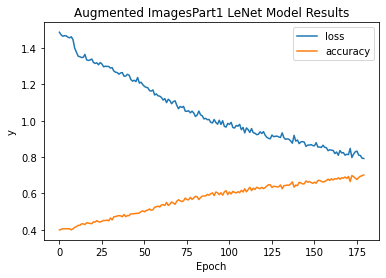

In [25]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(xlabel='Epoch',ylabel='y',title='Augmented ImagesPart1 LeNet Model Results')

In [26]:
print('Loss average = ' + str(np.mean(loss_df['loss'])))
print('Accuracy average = ' + str(np.mean(loss_df['accuracy'])))
#print('Val_loss average = ' + str(np.mean(loss_df['val_loss'])))
#print('Val_accuracy average = ' + str(np.mean(loss_df['val_accuracy'])))

Loss average = 1.0571756084760031
Accuracy average = 0.5700541668468051


In [27]:
print('Accuracy average = ' + str(np.max(loss_df['accuracy'])))

Accuracy average = 0.7012500166893005


In [28]:
# Saving a model
from tensorflow.keras.models import load_model
model.save('./Models/lenet_augImagesPart1_80_20.h5')

In [ ]:
later_model = load_model('my_gem_model.h5')
later_model.predict(new_gem)

In [138]:
test_predictions = model.predict(X_test)
test_predictions[0:10]

array([[3.69596362e-01, 3.79122853e-01, 1.49515703e-01, 3.29651684e-02,
        3.75025868e-02, 4.63782856e-03, 2.66594030e-02],
       [5.17751370e-03, 1.86049771e-02, 1.15459234e-01, 1.39590702e-03,
        3.85492802e-01, 7.32359588e-02, 4.00633633e-01],
       [1.63392961e-01, 2.13859051e-01, 7.28580207e-02, 5.01822710e-01,
        2.81071160e-02, 6.93894969e-03, 1.30212000e-02],
       [3.47603947e-01, 2.74494868e-02, 1.60411060e-01, 2.29195446e-01,
        1.32644817e-01, 1.67623477e-03, 1.01018906e-01],
       [4.99490052e-01, 9.43688303e-02, 2.62497663e-01, 9.24303755e-02,
        1.67206079e-02, 5.68338946e-05, 3.44355963e-02],
       [6.98847231e-03, 2.41485089e-02, 1.34049043e-01, 2.24127289e-04,
        4.80317116e-01, 2.37872023e-02, 3.30485493e-01],
       [3.76148405e-03, 2.29128674e-02, 1.06659569e-01, 4.73649794e-04,
        3.25137556e-01, 1.91000337e-03, 5.39144933e-01],
       [6.01343699e-02, 3.84125888e-01, 1.83475271e-01, 2.60285944e-01,
        6.46075159e-02, 7

In [121]:
y_test[0:10]

array([2, 4, 2, 0, 2, 6, 4, 2, 4, 3], dtype=int64)